In [1]:
import pandas as pd
import re
import nltk
import pickle

In [2]:
message=pd.read_csv("SMSSpamCollection",sep='\t',names=['label','message'])

In [3]:
print(message.shape)
message.head()

(5572, 2)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [5]:
ps=PorterStemmer()
corpus=[]

In [6]:
#data preprocessing
for i in range(0,len(message)):
    review=re.sub("[^a-zA-Z]",' ',message['message'][i])
    review=review.lower()
    review=review.split()
    
    review=[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    corpus.append(review)

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [8]:
#creating bag of words
cv=CountVectorizer(max_features=5000)#only give 5000 frequent column
X=cv.fit_transform(corpus).toarray()

In [9]:
#now convert string labels into one hot encoded form
y=pd.get_dummies(message['label'])

In [10]:
y=y.iloc[:,1].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB().fit(X_train,y_train)

In [12]:
y_predict=model.predict(X_test)

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [14]:
con=confusion_matrix(y_test,y_predict)
model.score(X_test,y_test)

0.9847533632286996

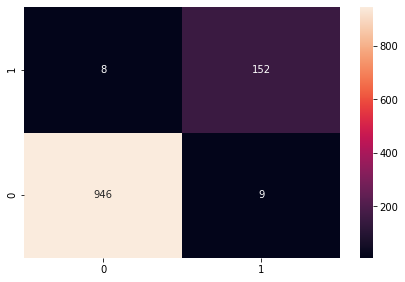

In [15]:
import matplotlib.pyplot as plt
sns.heatmap(con,annot=True,fmt='d')
plt.xlim(0,2)
#plt.xticks(rotation=45)
plt.ylim(0,2)
plt.tight_layout(True)
plt.show()